## Cancer detection

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from functions import*

### Load and visualize data

In [2]:
X, y, feature_names = load_data('Data_set.csv')

In [3]:
print(np.shape(X))
print(np.shape(y))

(569, 30)
(569,)


#### Scaling of data

In [4]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[2.11290e+01 2.95700e+01 1.44710e+02 2.35750e+03 1.10770e-01 3.26020e-01
 4.26800e-01 2.01200e-01 1.98000e-01 4.74800e-02 2.76150e+00 4.52480e+00
 2.12230e+01 5.35398e+02 2.94170e-02 1.33148e-01 3.96000e-01 5.27900e-02
 7.10680e-02 2.89452e-02 2.81100e+01 3.75200e+01 2.00790e+02 4.06880e+03
 1.51430e-01 1.03071e+00 1.25200e+00 2.91000e-01 5.07300e-01 1.52460e-01]
Peak to Peak range by column in Normalized X:[ 6.00093595  6.88113749  5.96063388  6.70497191  7.882996    6.17856132
  5.35846167  5.18974924  7.22886793  6.73078407  9.96683347  8.20954327
 10.50603465 11.77967134  9.80606425  7.4415804  13.13018108  8.56304825
  8.60480709 10.94856075  5.82108992  6.10989906  5.9806985   7.15259524
  6.63806903  6.55675567  6.00649946  4.43093984  8.20700104  8.44869553]


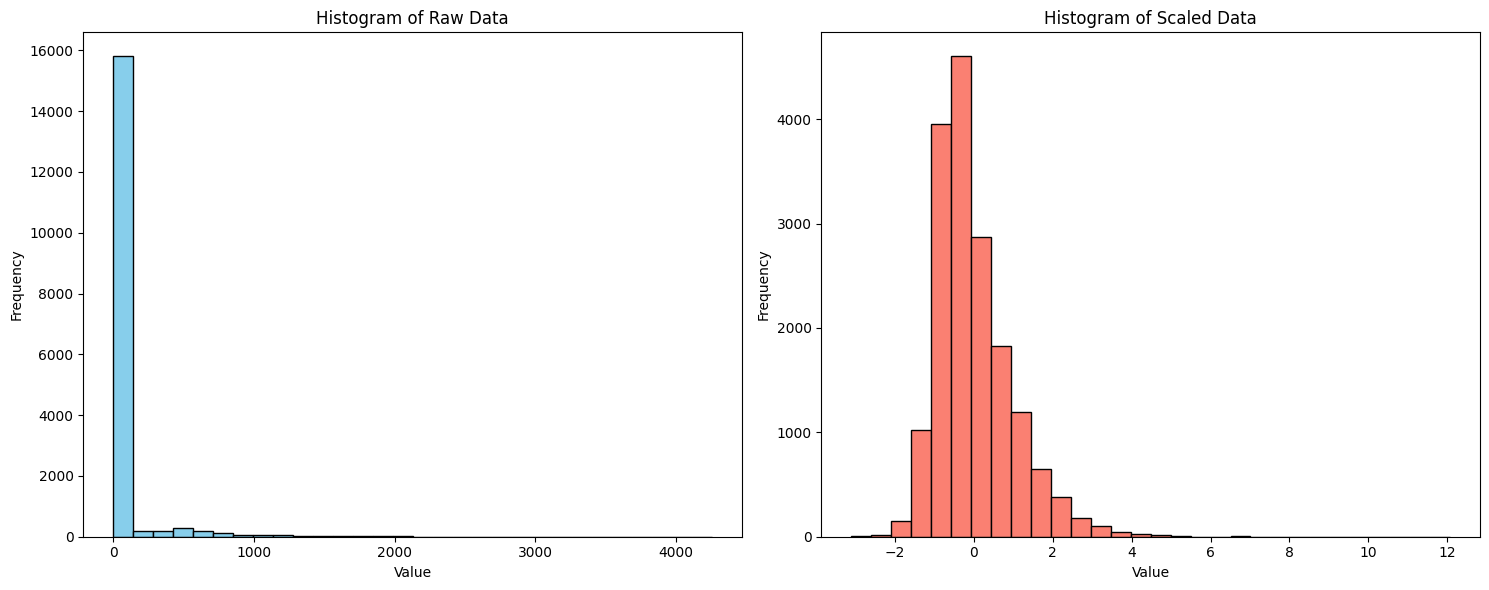

In [5]:
plot_histograms(X,X_norm)

#### Spliting data for training and testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
print("Shape of X_train:", np.shape(X_train))
print("Shape of y_train:", np.shape(y_train))
print("Shape of X_test:", np.shape(X_test))
print("Shape of y_test:", np.shape(y_test))

Shape of X_train: (455, 30)
Shape of y_train: (455,)
Shape of X_test: (114, 30)
Shape of y_test: (114,)


## Model Selection

#### Define model

In [8]:
model = Sequential([
    Dense(32, input_shape=(30,), activation='relu'),  # 30 features per data point
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

C:\Users\Sreerag\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile Model

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### train Model

In [10]:
train_model(X_train, y_train, X_test, y_test, model)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4543 - loss: 35.8193 - val_accuracy: 0.6316 - val_loss: 2.5008
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7905 - loss: 0.8392 - val_accuracy: 0.9386 - val_loss: 0.1948
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9074 - loss: 0.2939 - val_accuracy: 0.9211 - val_loss: 0.1807
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8888 - loss: 0.3229 - val_accuracy: 0.9035 - val_loss: 0.3428
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8871 - loss: 0.3885 - val_accuracy: 0.8860 - val_loss: 0.3631
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8454 - loss: 0.3996 - val_accuracy: 0.9123 - val_loss: 0.2608
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8788 - loss: 0.3262 - val_accuracy: 0.9474 - val_loss: 0.1447
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9009 - loss: 0.2526 - val_accuracy: 0.9561

### Testing of Model

In [38]:
def binary_predict(X_new):
    X_new = np.expand_dims(X_new, axis=0)
    predictions = model.predict(X_new)
    predictions = (predictions >= 0.5).astype(int)
    print(predictions)

In [39]:
X_new = X_test[6]
binary_predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[[1]]
